In [1]:
# In[1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:

df = pd.read_csv('Housing.csv')


binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


scaler = StandardScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop('price', axis=1)
y = df['price']

print("Preprocessed Data Preview:")
print(X.head())
                                          

    



Preprocessed Data Preview:
       area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0  1.046726  1.403419   1.421812  1.378217         1          0         0   
1  1.757010  1.403419   5.405809  2.532024         1          0         0   
2  2.218232  0.047278   1.421812  0.224410         1          0         1   
3  1.083624  1.403419   1.421812  0.224410         1          0         1   
4  1.046726  1.403419  -0.570187  0.224410         1          1         1   

   hotwaterheating  airconditioning   parking  prefarea  \
0                0                1  1.517692         1   
1                0                1  2.679409         0   
2                0                0  1.517692         1   
3                0                1  2.679409         1   
4                0                1  1.517692         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                    

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("data training testing is done")

data training testing is done


In [5]:

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print('--- Multiple Linear Regression Evaluation ---')
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('R-squared (R²):', metrics.r2_score(y_test, y_pred))

--- Multiple Linear Regression Evaluation ---
Mean Absolute Error (MAE): 0.519094319027634
Mean Squared Error (MSE): 0.5023642289784895
R-squared (R²): 0.6529242642153178


In [6]:

X_simple = df[['area']]
y_simple = df['price']


X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)


simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)


y_pred_simple = simple_model.predict(X_test_simple)

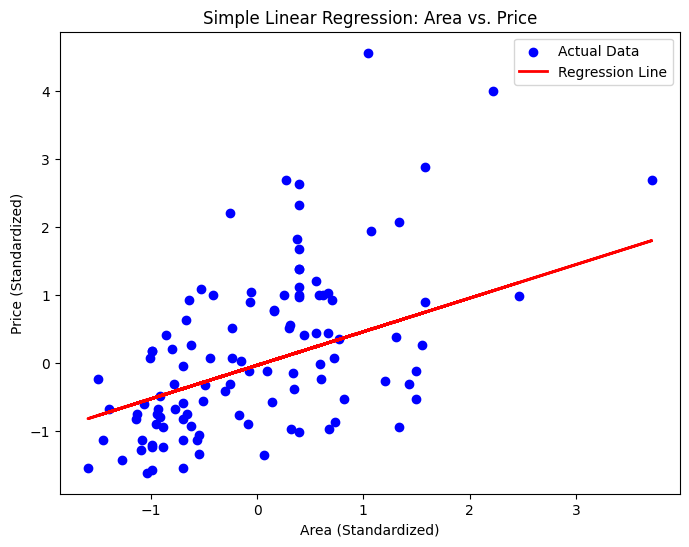

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', label='Actual Data')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Area vs. Price')
plt.xlabel('Area (Standardized)')
plt.ylabel('Price (Standardized)')
plt.legend()
plt.show()

In [8]:

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

print("--- Multiple Linear Regression Interpretation ---")
print("\nModel Intercept:", model.intercept_)
print("\nModel Coefficients:")
print(coefficients)

--- Multiple Linear Regression Interpretation ---

Model Intercept: -0.4089997059995469

Model Coefficients:
                                 Coefficient
area                                0.273778
bedrooms                            0.030296
bathrooms                           0.294009
stories                             0.188984
mainroad                            0.196883
guestroom                           0.123940
basement                            0.208833
hotwaterheating                     0.366373
airconditioning                     0.423512
parking                             0.103570
prefarea                            0.337070
furnishingstatus_semi-furnished    -0.067898
furnishingstatus_unfurnished       -0.221352
